The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:
- Business understanding – What does the business need?
- Data understanding – What data do we have / need? Is it clean?
- Data preparation – How do we organize the data for modeling?
- Modeling – What modeling techniques should we apply?
- Evaluation – Which model best meets the business objectives?
- Deployment – How do stakeholders access the results?

# Business Understanding

Airline businesses heavily rely on customer satisfaction to establish trust and loyalty, leading to recurring passengers and increased revenue. To ensure customer satisfaction, it is crucial to identify the factors that contribute to passenger satisfaction or dissatisfaction. In this project, our main objective is to **explore and analyze the dataset to determine the key factors highly correlated with passenger satisfaction and dissatisfaction**. By understanding these factors, we can develop a predictive model that accurately forecasts passenger satisfaction.

By gaining insights into the factors influencing passenger satisfaction, airline businesses can focus on areas that have the most significant impact. This understanding allows them to **make informed decisions and implement strategies to enhance the overall passenger experience**. Additionally, a predictive model enables the airline to **anticipate passenger satisfaction levels and proactively address potential issues, leading to improved customer retention and positive word-of-mouth.

Ultimately, the insights gained from this project will help airline businesses **identify areas for improvement, implement targeted strategies, and prioritize efforts to enhance passenger satisfaction**. By continuously monitoring and refining the model, airlines can adapt to evolving passenger needs and preferences, ensuring a positive and satisfactory experience that fosters customer loyalty and maximizes business success.

# Data Understanding

## Metadata
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

## Exploring the Data

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>

* <i>There are total of <b><u>23</u></b> columns : <b><u>18</u></b> continous , <b><u>4</u></b> categorical and <b><u>1</u></b> target column</i><br>
* <i> There are total of <b><u>103904</u></b> rows in train dataset.</i><br>
* <i> <b><u>Satisfaction</u></b> is the target variable
* <i> The dataset have <b><u>310</u></b>  missing / null values in Arrival Delay in Minutes column.</i><br>
    
</div>

In [3]:
target = 'satisfaction'
features = [col for col in df.columns if col not in [target]]

In [4]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.000000,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000000,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000000,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000000,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000000,satisfied


In [5]:
print(f'Number of rows in dataframe: {df.shape[0]}')
print(f'Number of columns in dataframe: {df.shape[1]}')

Number of rows in dataframe: 103904
Number of columns in dataframe: 23


### Continuos and Categorical Data Distribution

In [6]:
cat_features = [col for col in features if df[col].nunique() < 25]
cont_features = [col for col in features if df[col].nunique() >= 25]
print(f"Number of categorical features in dataframe: {len(cat_features)}")
print(f"Number of continous features in dataframe: {len(cont_features)}")

Number of categorical features in dataframe: 18
Number of continous features in dataframe: 4


### Missing Values Distribution

In [7]:
# Missing Values
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

There is 310 missing values in Arrival Delay in Minutes Feature, we will handle it later in Data Preparation Phase

### Basic Statistics

In [8]:
# Basic Statistics
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000



Here are some key insights from the provided data statistics:

- Passengers' ages range from 7 to 85 years, with an average age of 39 years.

- The flight distances vary widely, ranging from 31 to 4983 kilometers, with an average distance of 1189 kilometers.

- The other columns is satisfaction level about different criteria from a scale of 5 (1-5).

### Feature Distribution of Continous Features

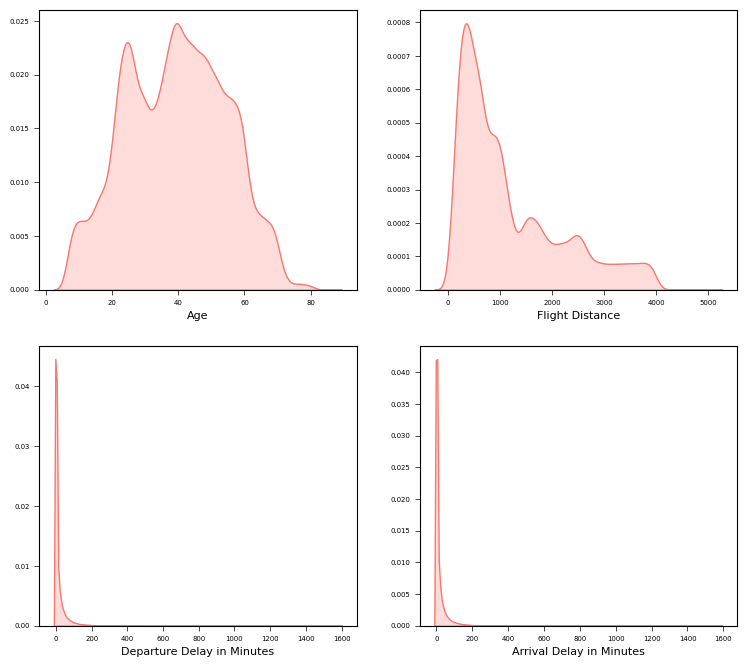

In [9]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(9, 8))

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c], color='#F8766D' , fill =True )
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

- The Age feature appears to follow a normal distribution.
- The Flight Distance feature exhibits a right-skewed distribution.
- both the Departure Delay and Arrival Delay features display similar extreme right-skewed distributions.

Note that we will handle missing values in the "Arrival Delay in Minutes" feature. It is important to remember that this feature has an extreme right skew. Additionally, we will apply a transformation to the data with a skewed distribution later on.

### Feature Distribution of Categorical Features

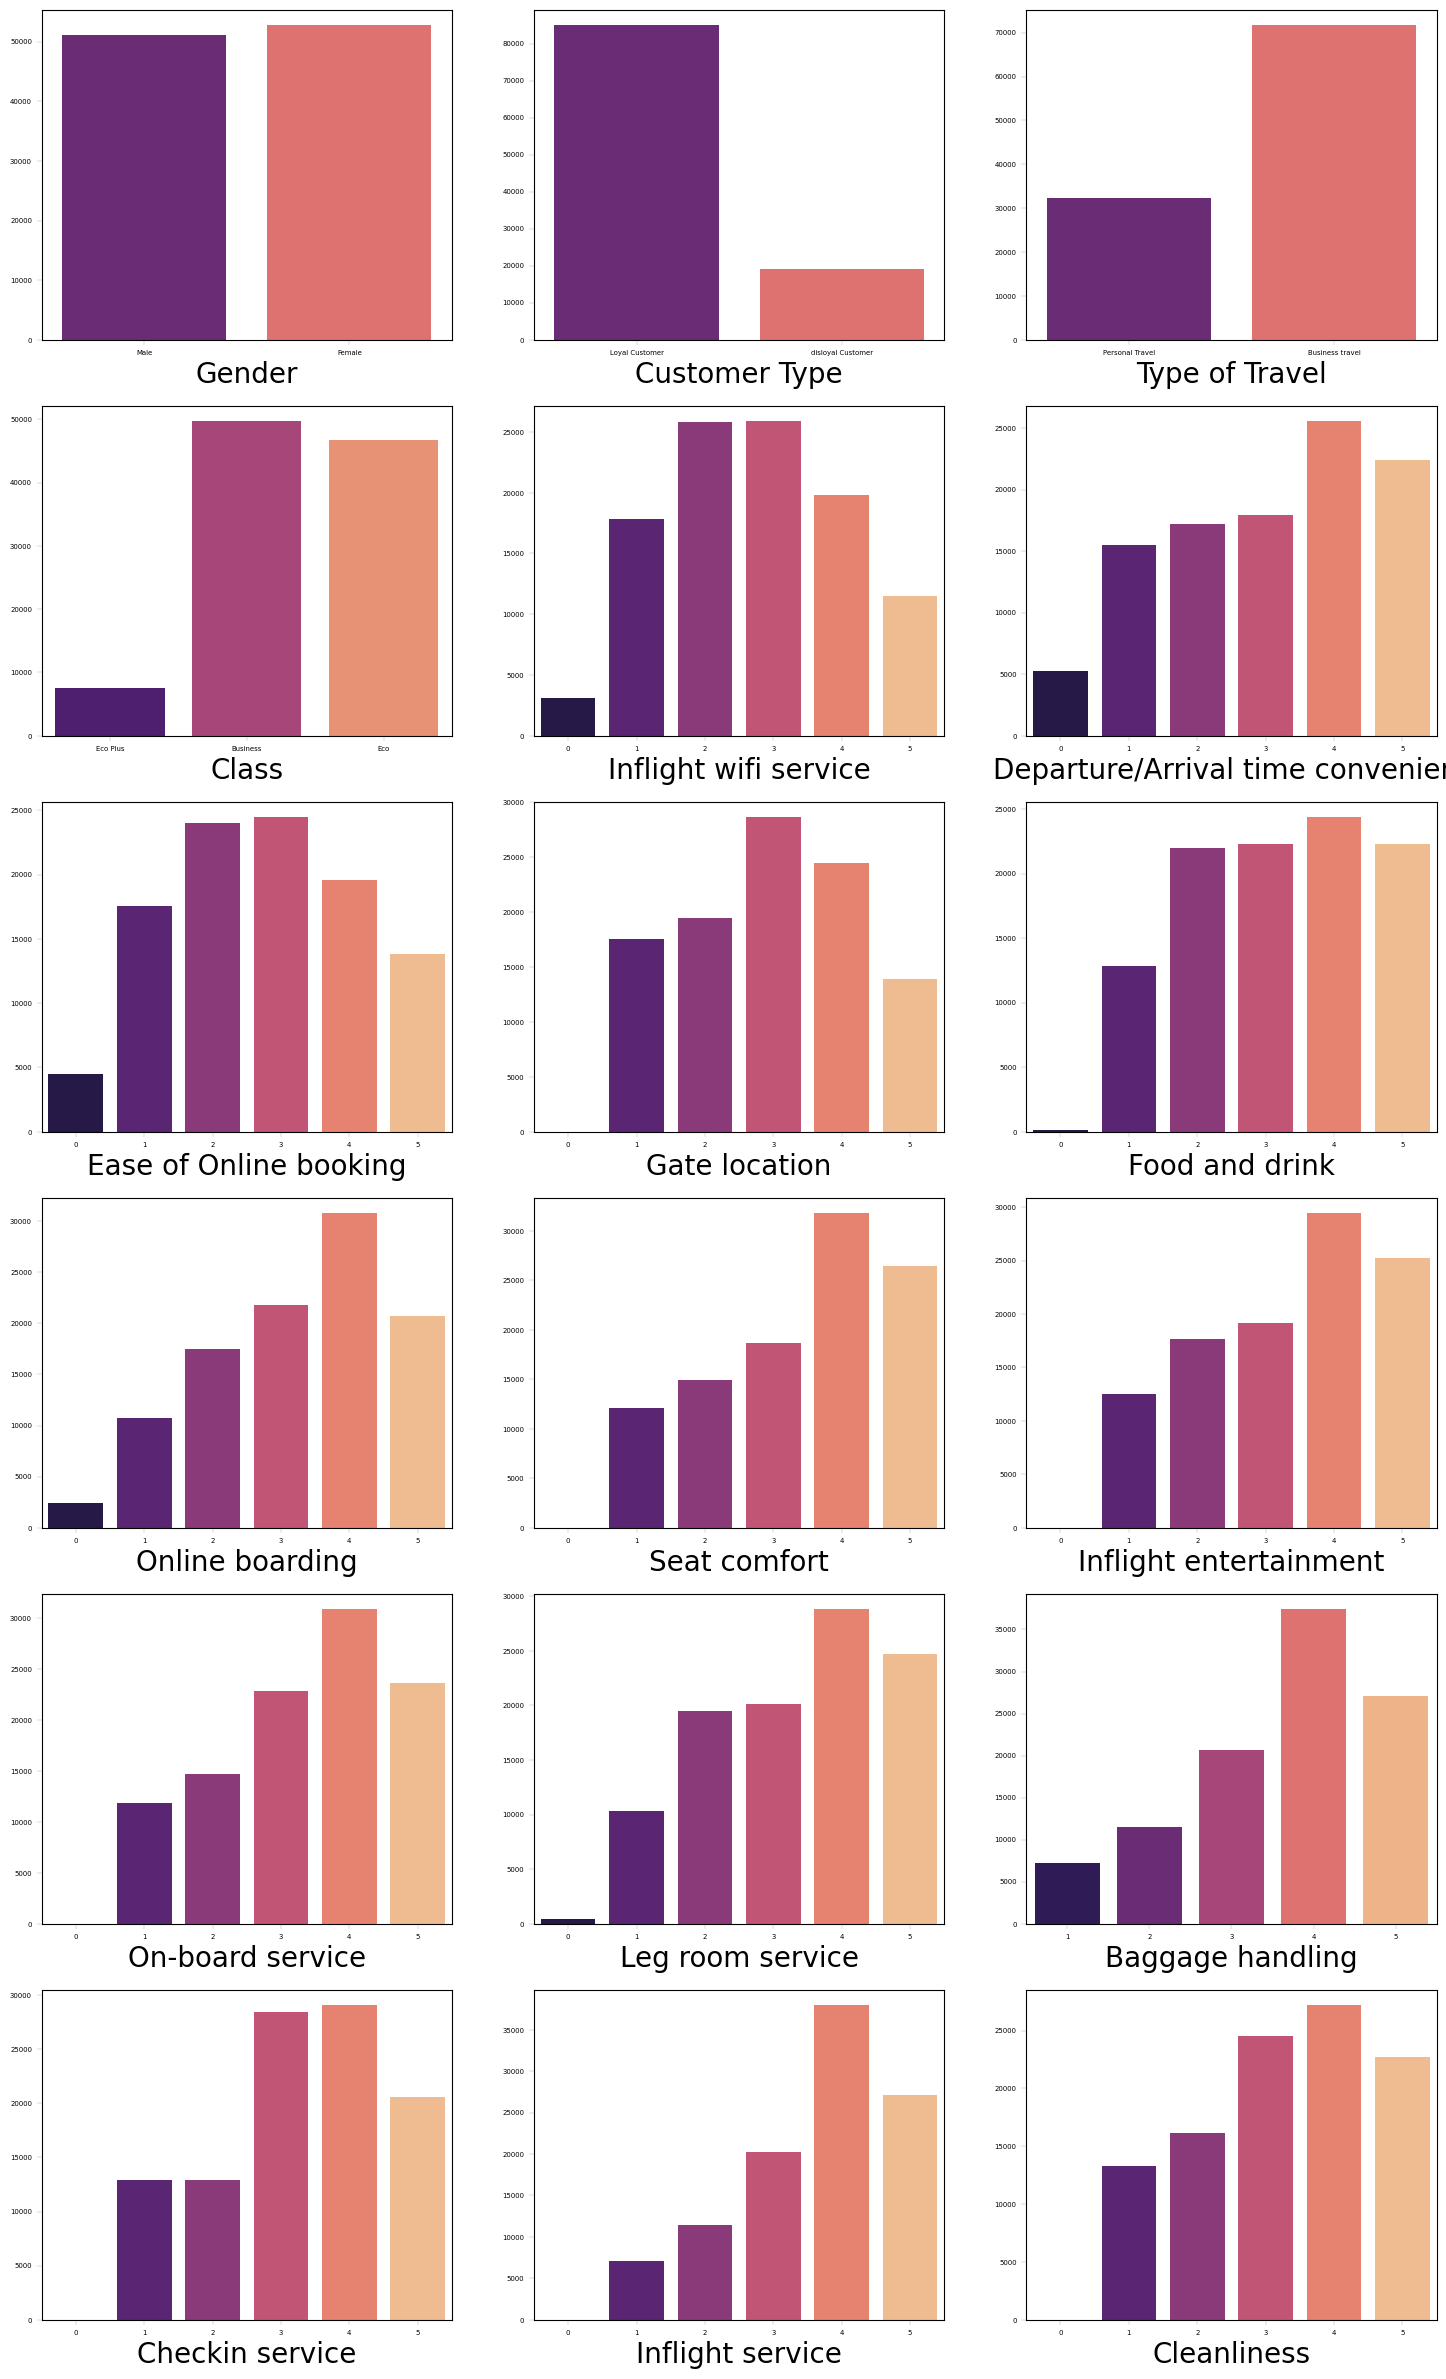

In [10]:
ncols = 3
nrows = 6

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 30))
for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.countplot(x=df[col], ax=axes[r, c],palette = "magma")
        axes[r,c].set_ylabel('')
        axes[r,c].set_xlabel(col, fontsize=20)
        axes[r,c].tick_params(labelsize=5, width=0.1)
        axes[r,c].xaxis.offsetText.set_fontsize(2)
        axes[r,c].yaxis.offsetText.set_fontsize(4)
plt.show()

- The distribution of gender among the passengers using this airline is balanced. 
- There are significantly more loyal customers than disloyal customers. 
- The number of passengers traveling for business purposes is twice as high as those traveling for personal reasons. The satisfaction level related features have mean values around 3 and 4.
- There are relatively few people in the Eco Plus class compared to the Eco and Business classes.

### Boxplot

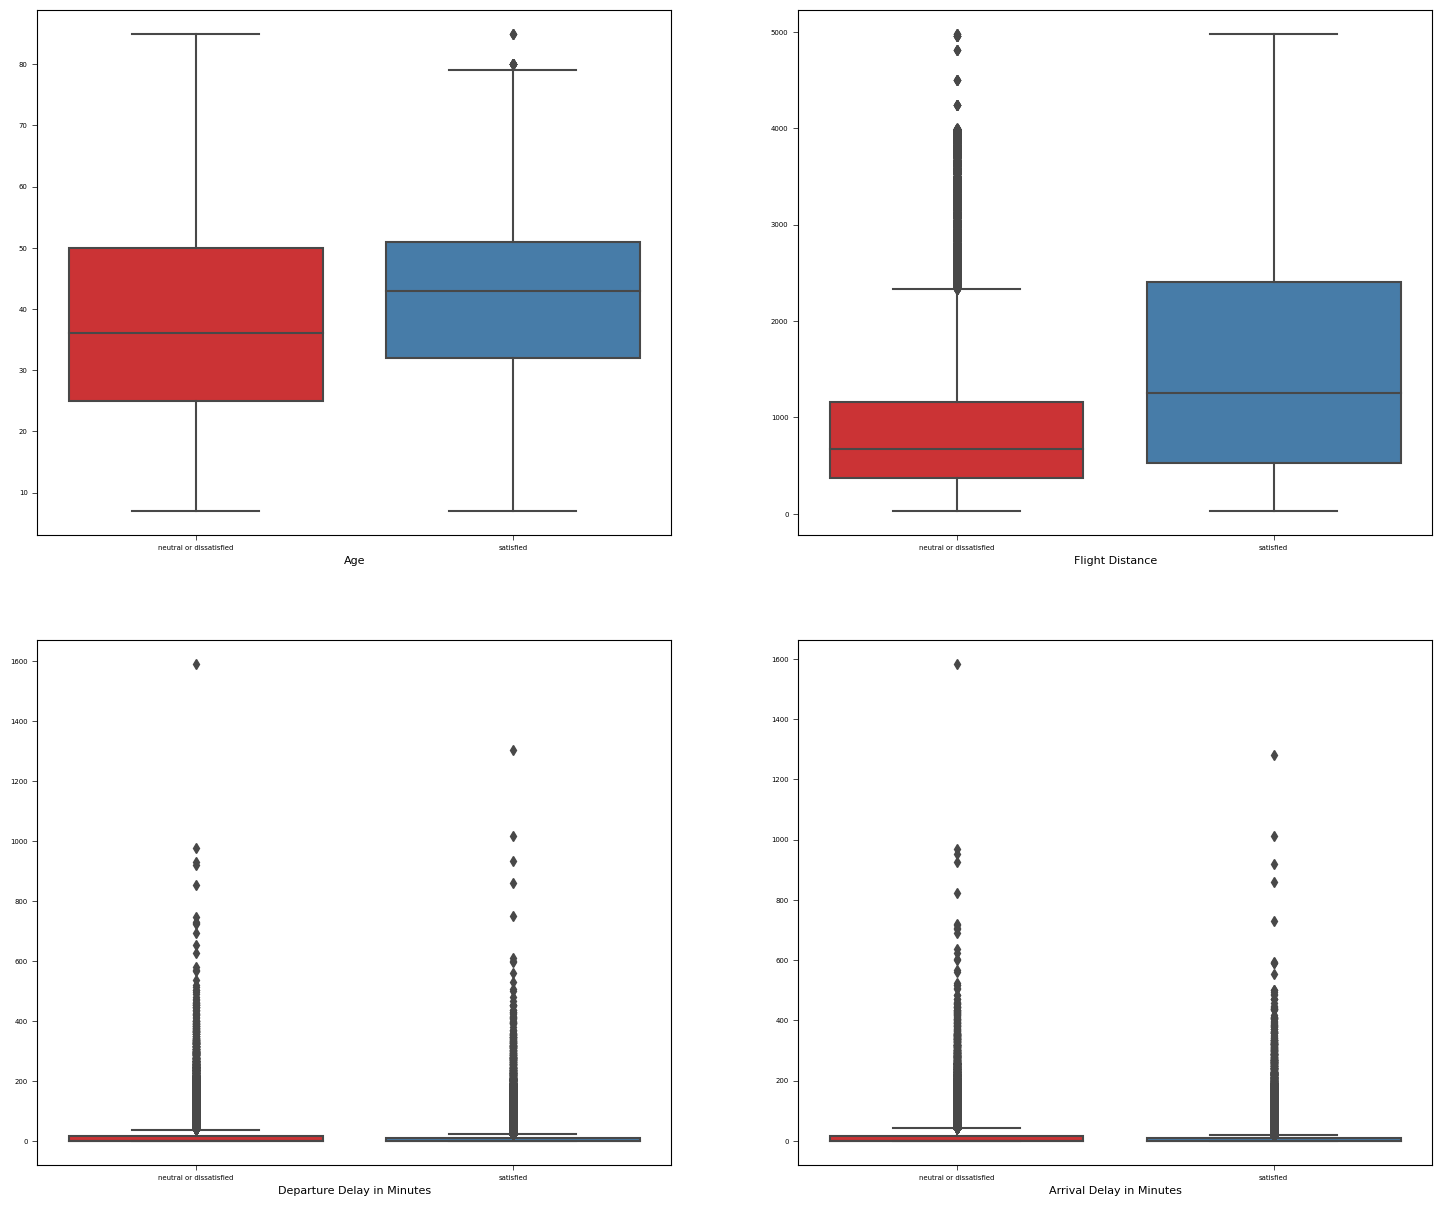

In [11]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 15))

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(y=df[col],x=df[target], ax=axes[r, c],palette='Set1')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(10)
        axes[r, c].yaxis.offsetText.set_fontsize(10)
plt.show()

- It is evident that both Departure Delay and Arrival Delay have a substantial number of outliers. 
- Additionally, there is a notable trend where passengers tend to be more satisfied when the flight distance is longer.

### Target Distribution

In [12]:
target_dist = df[target].value_counts()
target_dist

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [13]:
target_pct = target_dist[1]/(target_dist[0]+target_dist[1])
target_pct

0.43333269171542965

The target variable, representing passenger satisfaction, exhibits a relatively balanced dataset. Approximately 43% of passengers are classified as satisfied, while the remaining 57% fall into the categories of neutral or dissatisfied.

### Analysis using featexp library

Scatter plots are not effective when the dependent variable (target) is binary since the data points are concentrated at either 0 or 1. Similarly, for a continuous target variable with a large number of data points, it becomes challenging to discern the trend between the target and features using scatter plots alone. Using this library, we will try to look what feature is the most important for the satisfaction of a passenger

In [14]:
df['satisfaction'] = np.where(df['satisfaction']=='satisfied',1,0)
df = df.fillna(0)

                                            Plots for Age                                             


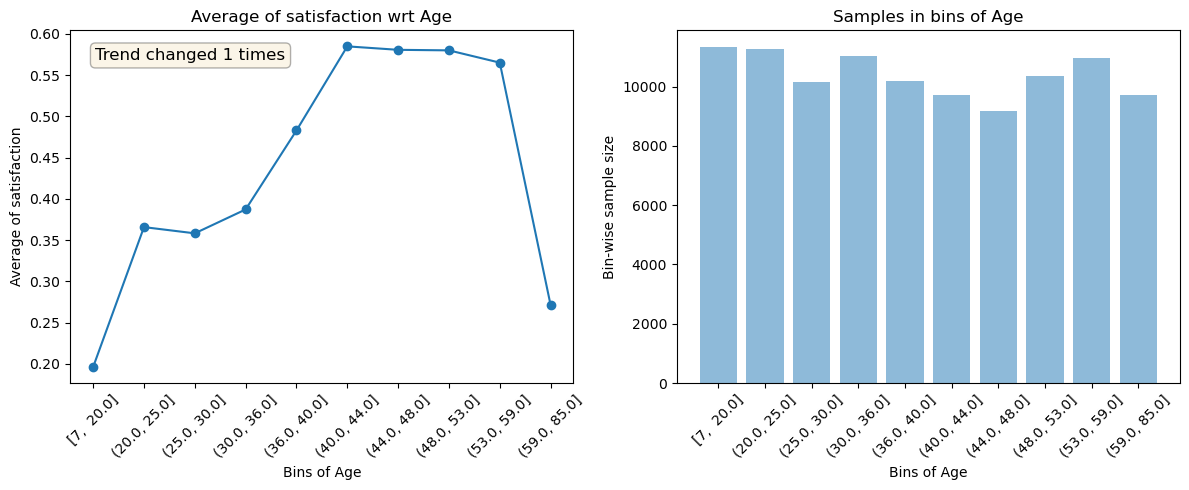

--------------------------------------------------------------------------------------------------------------


                                      Plots for Flight Distance                                       


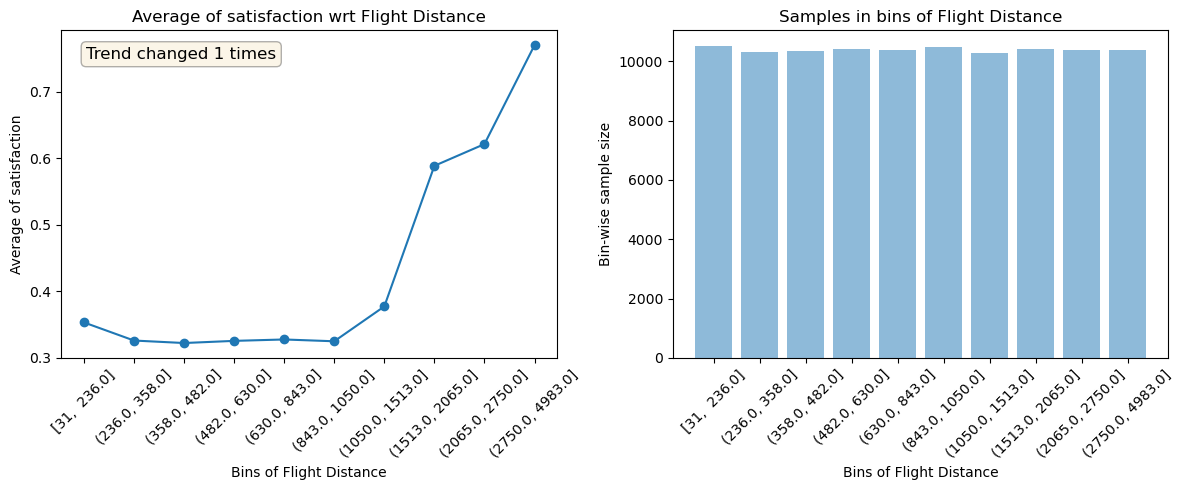

--------------------------------------------------------------------------------------------------------------


                                 Plots for Departure Delay in Minutes                                 


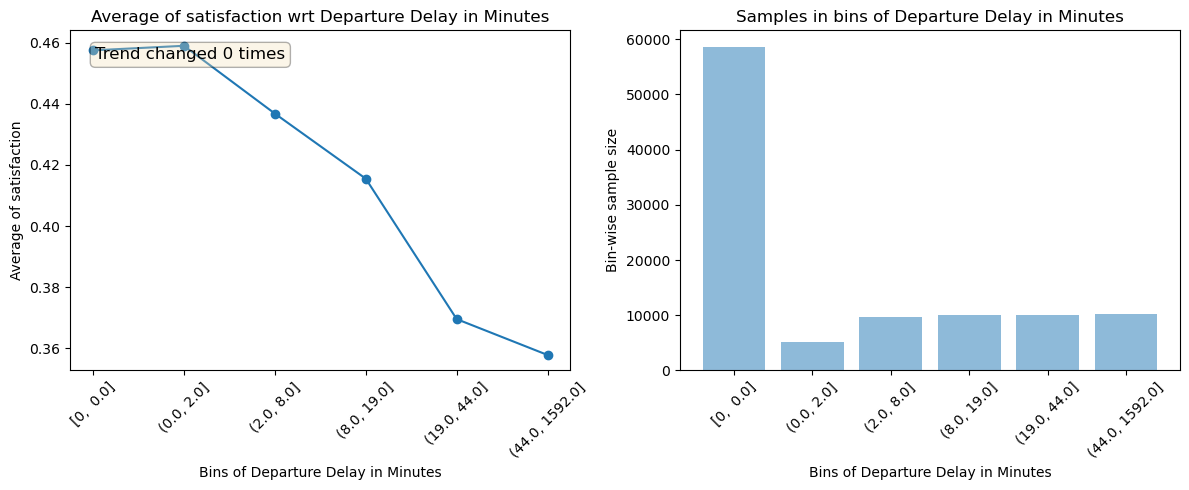

--------------------------------------------------------------------------------------------------------------


                                  Plots for Arrival Delay in Minutes                                  


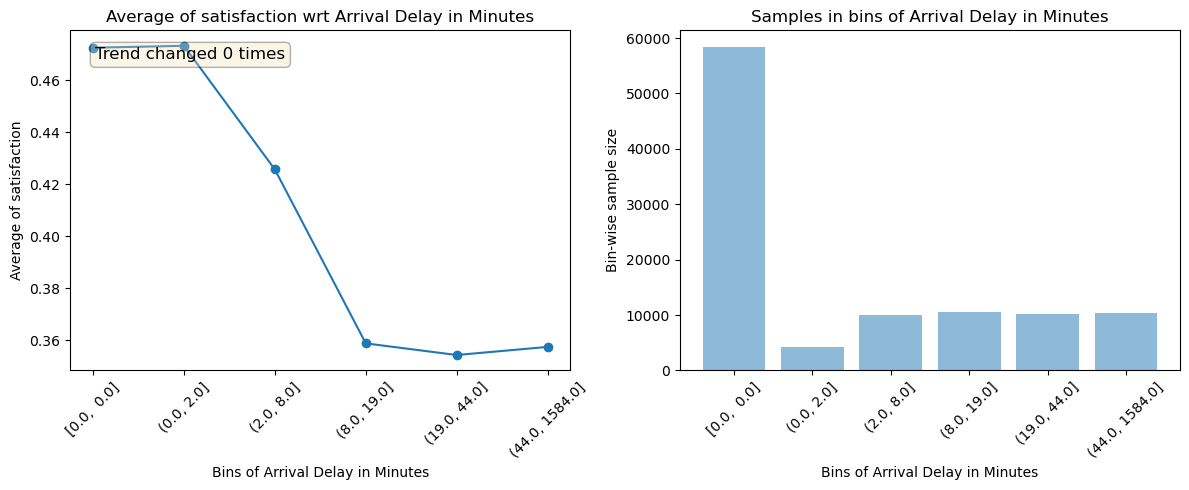

--------------------------------------------------------------------------------------------------------------




In [15]:
from featexp import get_univariate_plots

# Plots drawn for all features if nothing is passed in feature_list parameter.
get_univariate_plots(data=df, target_col='satisfaction', 
                     features_list=cont_features, bins=10)

- Based on the continuous features, it appears that satisfaction tends to increase as age increases. However, this trend breaks in the last age bin (59-85 years). This deviation may be due to the fact that the flying experience becomes less comfortable for older individuals.

- Furthermore, it is observed that the greater the distance of the flight, the higher the satisfaction level reported by passengers.

- As for delayed arrivals and departures, it is expected that longer delays lead to higher levels of dissatisfaction among passengers.

In [16]:
cat = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

                                   Plots for Inflight wifi service                                    


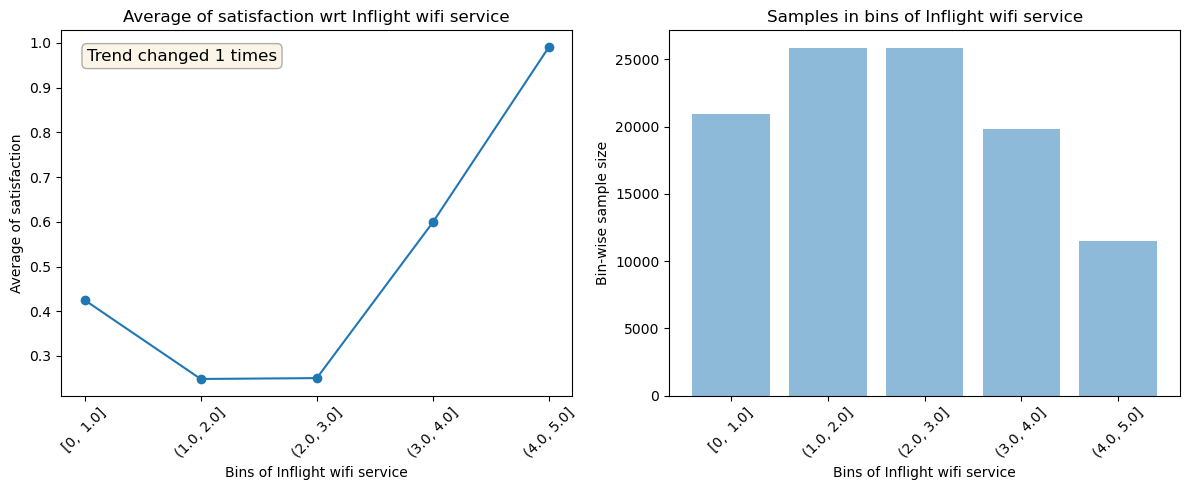

--------------------------------------------------------------------------------------------------------------


                             Plots for Departure/Arrival time convenient                              


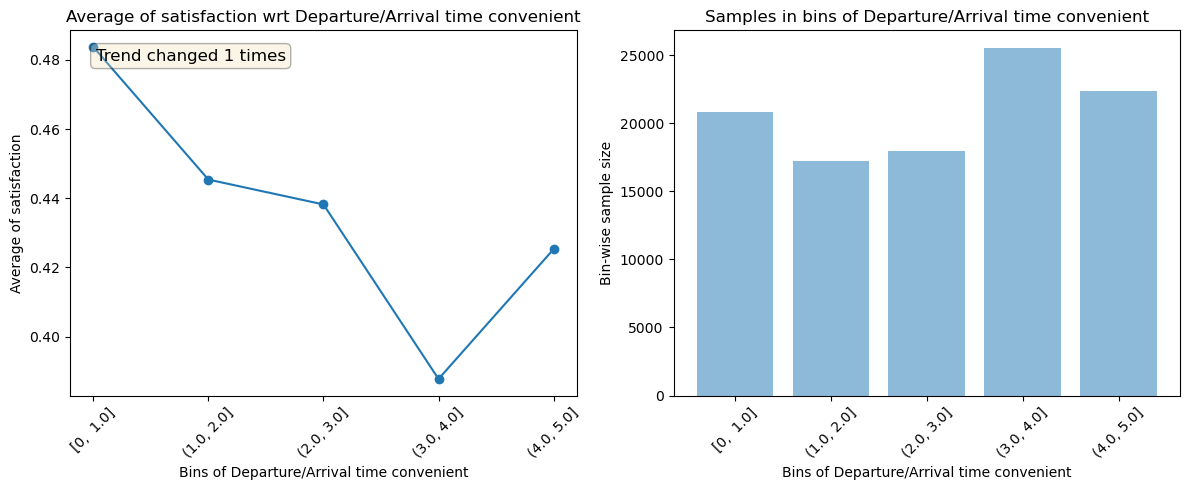

--------------------------------------------------------------------------------------------------------------


                                   Plots for Ease of Online booking                                   


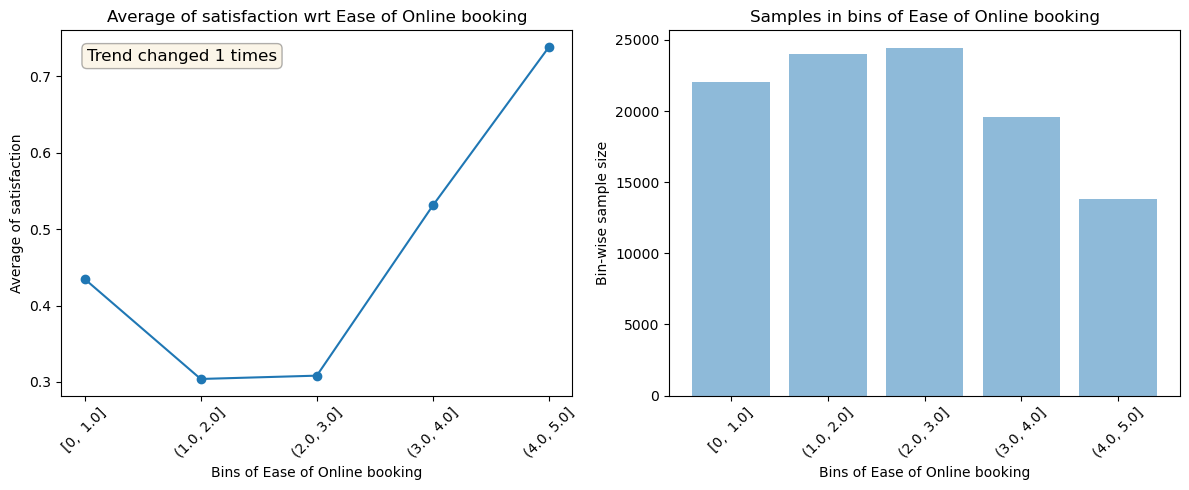

--------------------------------------------------------------------------------------------------------------


                                       Plots for Gate location                                        


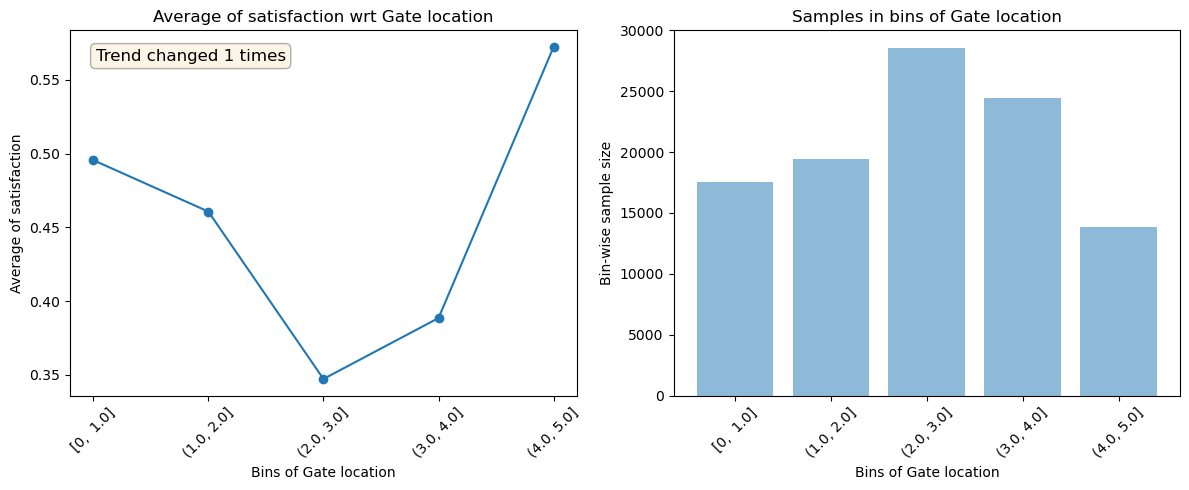

--------------------------------------------------------------------------------------------------------------


                                       Plots for Food and drink                                       


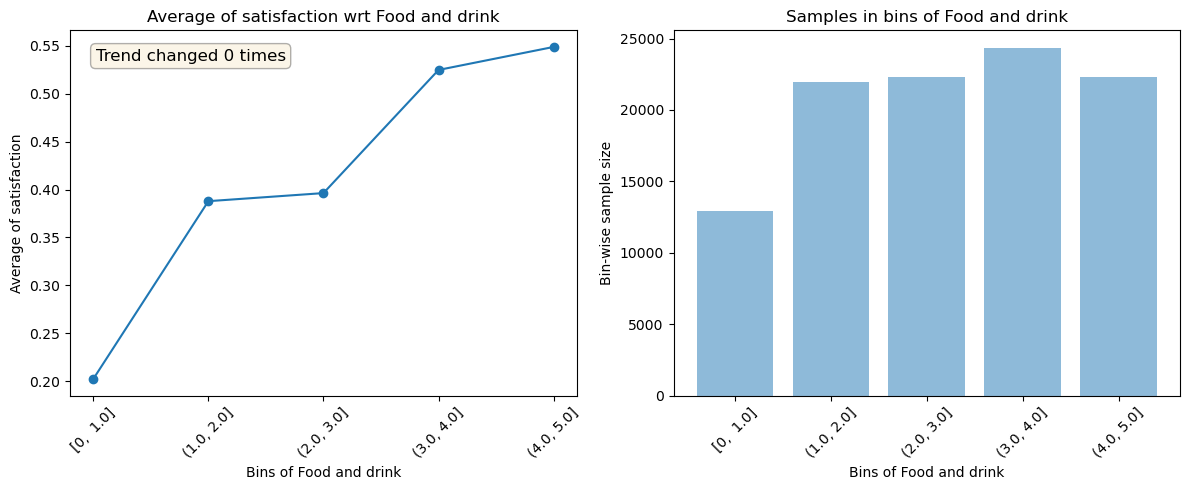

--------------------------------------------------------------------------------------------------------------


                                      Plots for Online boarding                                       


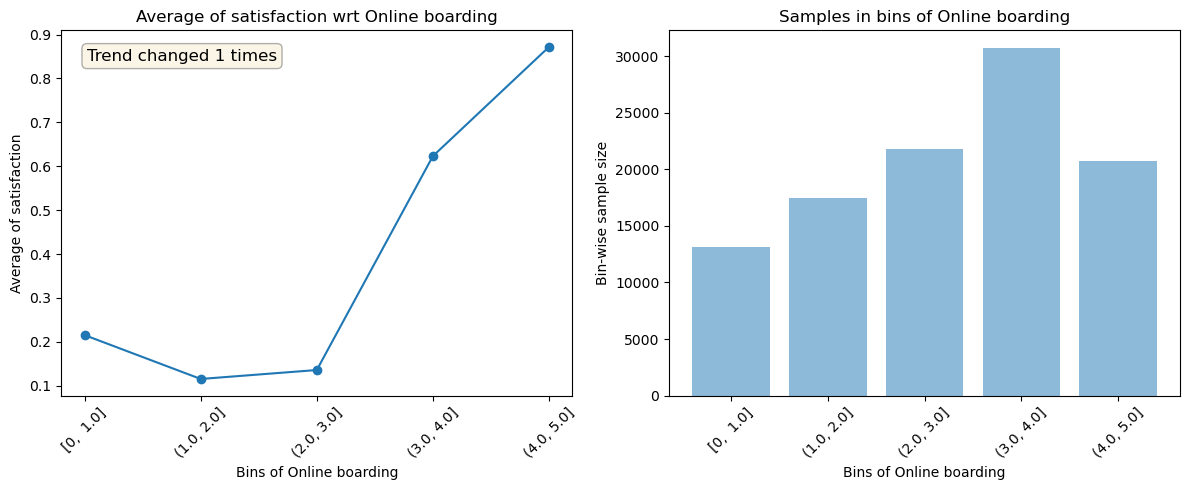

--------------------------------------------------------------------------------------------------------------


                                        Plots for Seat comfort                                        


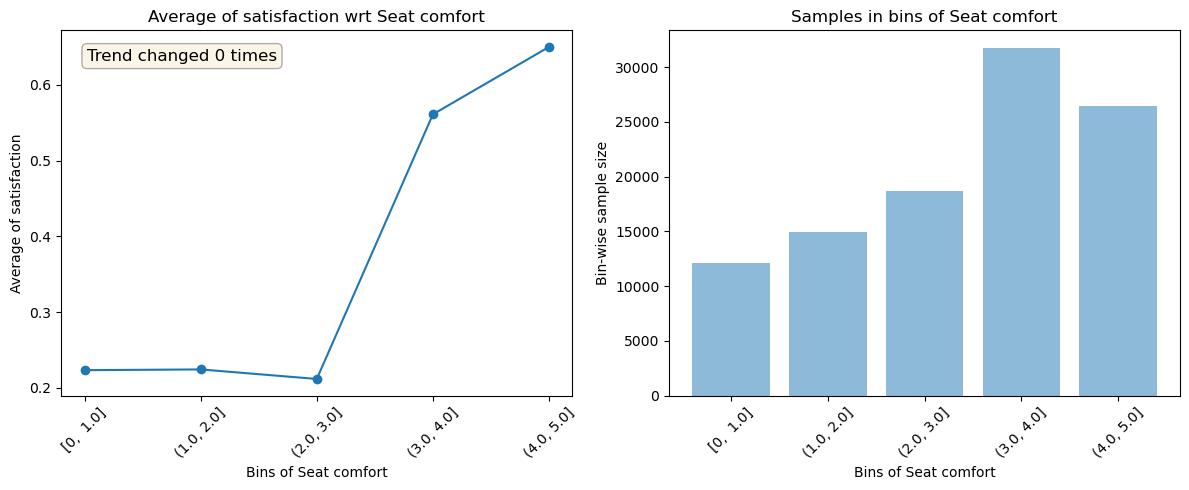

--------------------------------------------------------------------------------------------------------------


                                   Plots for Inflight entertainment                                   


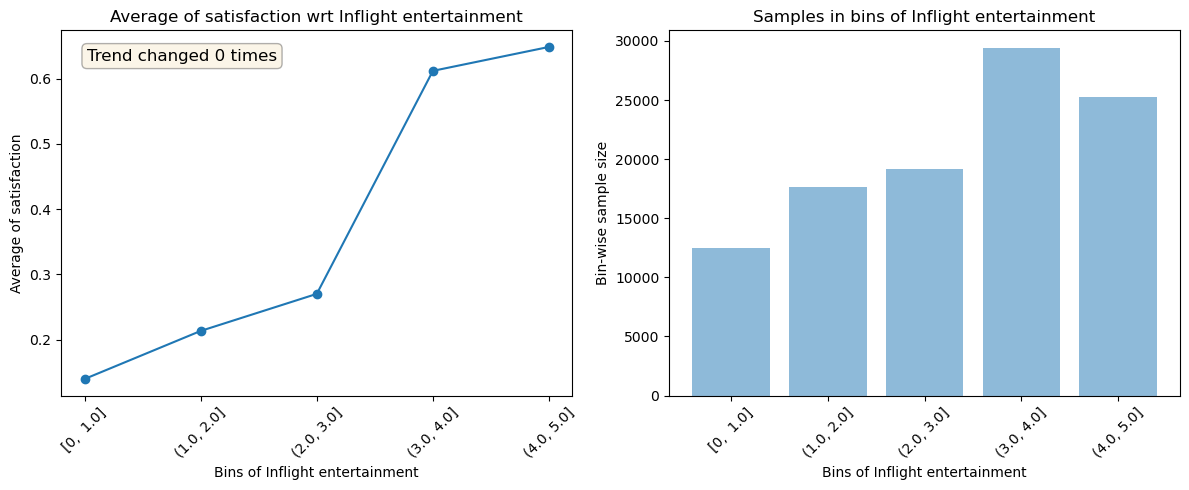

--------------------------------------------------------------------------------------------------------------


                                      Plots for On-board service                                      


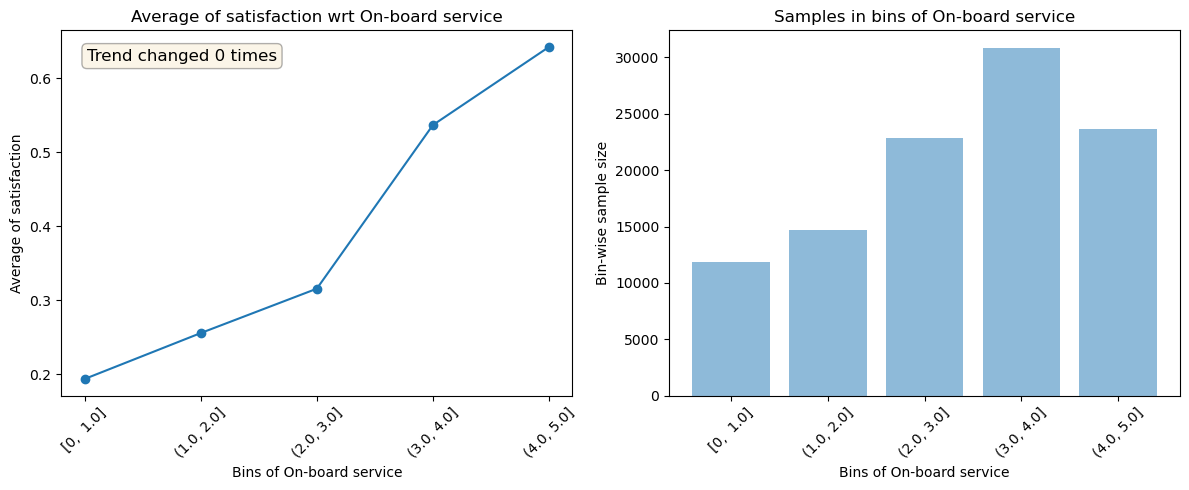

--------------------------------------------------------------------------------------------------------------


                                      Plots for Leg room service                                      


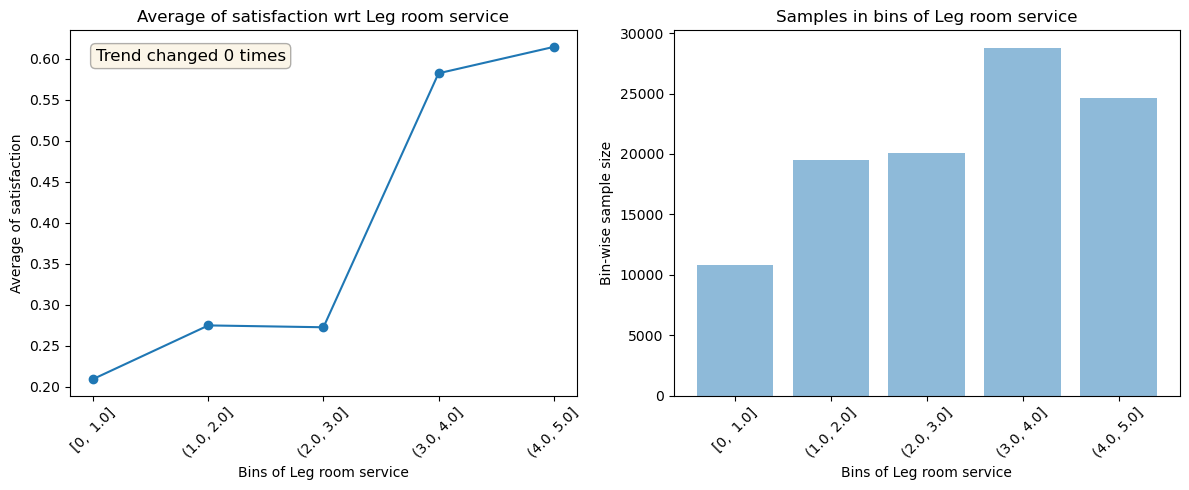

--------------------------------------------------------------------------------------------------------------


                                      Plots for Baggage handling                                      


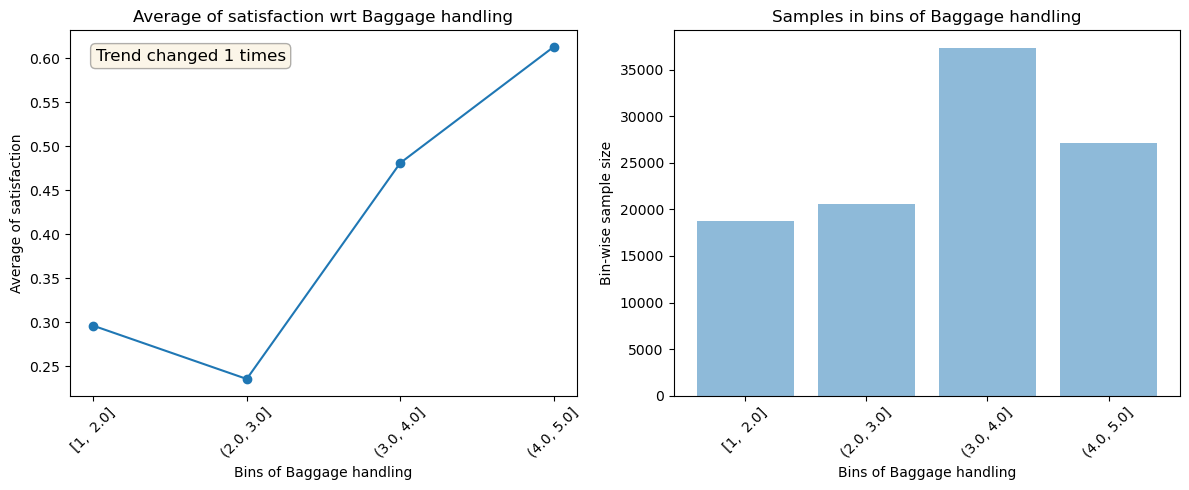

--------------------------------------------------------------------------------------------------------------


                                      Plots for Checkin service                                       


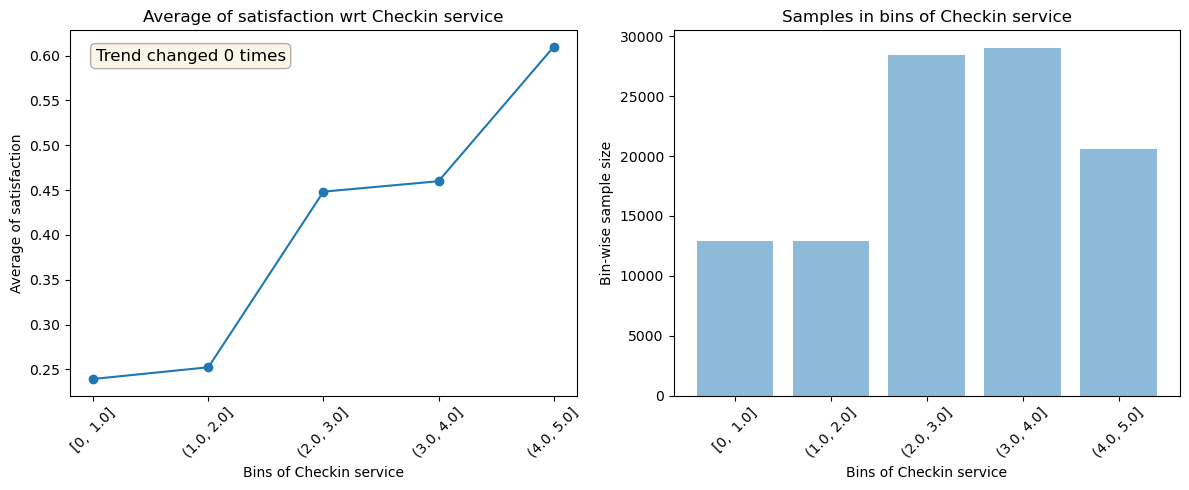

--------------------------------------------------------------------------------------------------------------


                                      Plots for Inflight service                                      


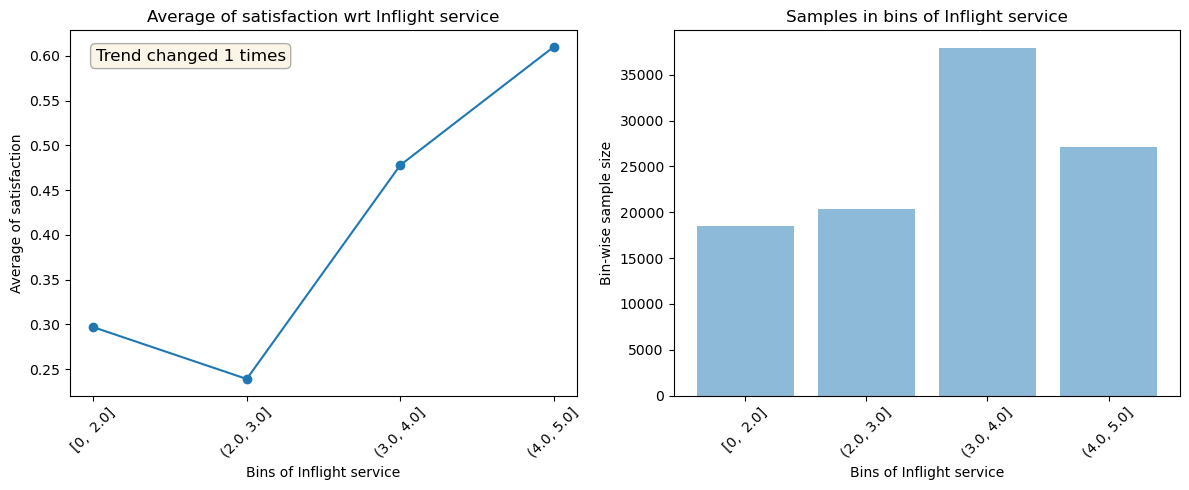

--------------------------------------------------------------------------------------------------------------


                                        Plots for Cleanliness                                         


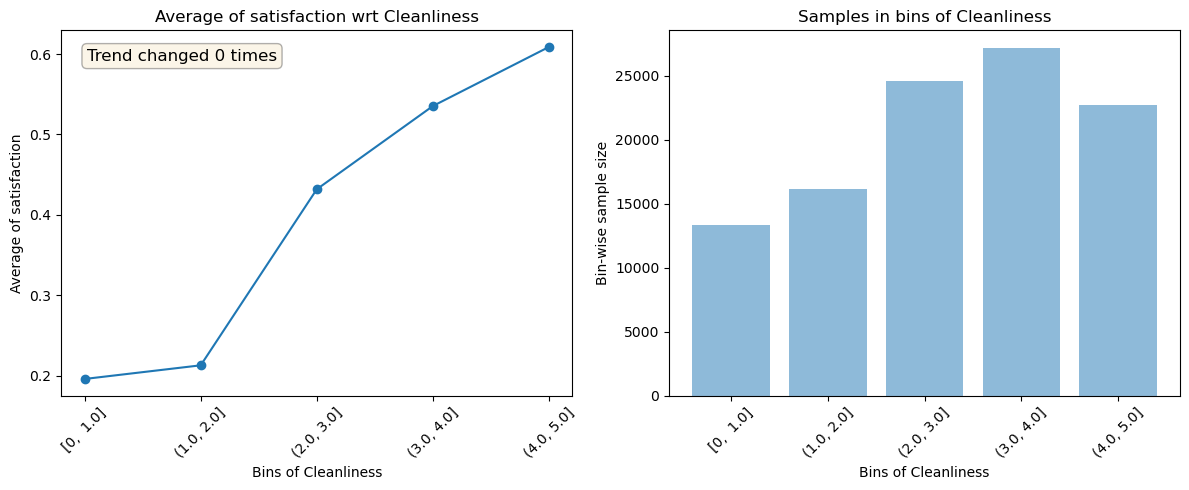

--------------------------------------------------------------------------------------------------------------




In [17]:
# Plots drawn for all features if nothing is passed in feature_list parameter.
get_univariate_plots(data=df, target_col='satisfaction', 
                     features_list=cat, bins=10)

- Based on the satisfaction level aspect, it is evident that the aspects with significant importance are Satisfaction with Online Boarding, Seat Comfort, and Legroom Service. This can be determined by examining the mean ratings for each aspect. It can be observed that ratings below 4 have a considerably low mean satisfaction level. However, the mean satisfaction level rises notably when the rating is 4 or 5.

- On the other hand, the aspects of Gate Location and Arrival/Departure Time Convenience do not seem to hold as much importance in terms of overall satisfaction levels.